In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [7]:
def fetch_option_data(ticker):
  Ticker = yf.Ticker(ticker)
  expirations = Ticker.options

  option_data = pd.DataFrame()

  for expiration in expirations:
    option_chain = Ticker.option_chain(expiration)

    calls = option_chain.calls
    calls['Option Type'] = "Call"

    puts = option_chain.puts
    puts['Option Type'] = "Put"

    options = pd.concat([calls, puts])
    options['Expiration Date'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=5)

    option_data = pd.concat([option_data, options])

  option_data["Days to Expiration"] = (option_data['Expiration Date'] - dt.datetime.today()).dt.days + 1

  return option_data

In [9]:
# Fetch the option data for NASDAQ
options_data = fetch_option_data("^NDX")

In [10]:
# Select call options
call_options = options_data[options_data["Option Type"] == "Call"]

In [11]:
# Print available expiration dates
print("Available Expiration Dates:")
print(set(call_options['Expiration Date']))

Available Expiration Dates:
{Timestamp('2024-06-11 23:59:05'), Timestamp('2024-05-24 23:59:05'), Timestamp('2024-06-21 23:59:05'), Timestamp('2024-12-31 23:59:05'), Timestamp('2024-05-23 23:59:05'), Timestamp('2025-03-21 23:59:05'), Timestamp('2025-04-17 23:59:05'), Timestamp('2024-05-22 23:59:05'), Timestamp('2025-06-20 23:59:05'), Timestamp('2024-06-10 23:59:05'), Timestamp('2025-02-21 23:59:05'), Timestamp('2024-05-30 23:59:05'), Timestamp('2024-05-20 23:59:05'), Timestamp('2024-06-05 23:59:05'), Timestamp('2024-06-03 23:59:05'), Timestamp('2024-08-16 23:59:05'), Timestamp('2024-09-30 23:59:05'), Timestamp('2024-06-07 23:59:05'), Timestamp('2024-11-15 23:59:05'), Timestamp('2025-03-31 23:59:05'), Timestamp('2024-06-14 23:59:05'), Timestamp('2024-05-28 23:59:05'), Timestamp('2024-07-05 23:59:05'), Timestamp('2026-12-18 23:59:05'), Timestamp('2025-12-19 23:59:05'), Timestamp('2024-10-18 23:59:05'), Timestamp('2024-07-19 23:59:05'), Timestamp('2025-05-16 23:59:05'), Timestamp('2024-05-

In [35]:
# Select an expiration date to plot
chosen_expiry_date = '2024-05-22 23:59:05'
selected_calls_at_expiry = call_options[call_options["Expiration Date"] == chosen_expiry_date]

In [36]:
# Filter out low implied volatility options
filtered_calls_at_expiry = selected_calls_at_expiry[selected_calls_at_expiry["impliedVolatility"] >= 0.005]

# Set the strike price as the index for better plotting
filtered_calls_at_expiry.set_index("strike", inplace=True)

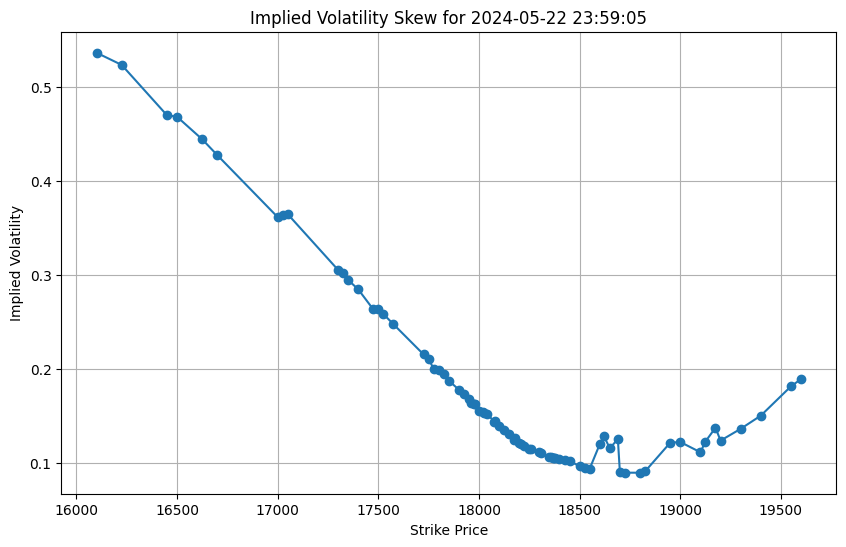

In [37]:
# Plot Implied Volatility Skew
plt.figure(figsize=(10,6))
plt.plot(filtered_calls_at_expiry.index, filtered_calls_at_expiry["impliedVolatility"], marker='o')
plt.title(f"Implied Volatility Skew for {chosen_expiry_date}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)

In [38]:
# Select a specific strike price to plot
selected_strike_price = 18000
selected_calls_at_strike = call_options[call_options["strike"] == selected_strike_price]

In [39]:
# Filter out low implied volatility options
filtered_calls_at_strike = selected_calls_at_strike[selected_calls_at_strike["impliedVolatility"] >= 0.001]

In [40]:
# Set the expiration date as the index for better plotting
filtered_calls_at_strike.set_index("Expiration Date", inplace=True)

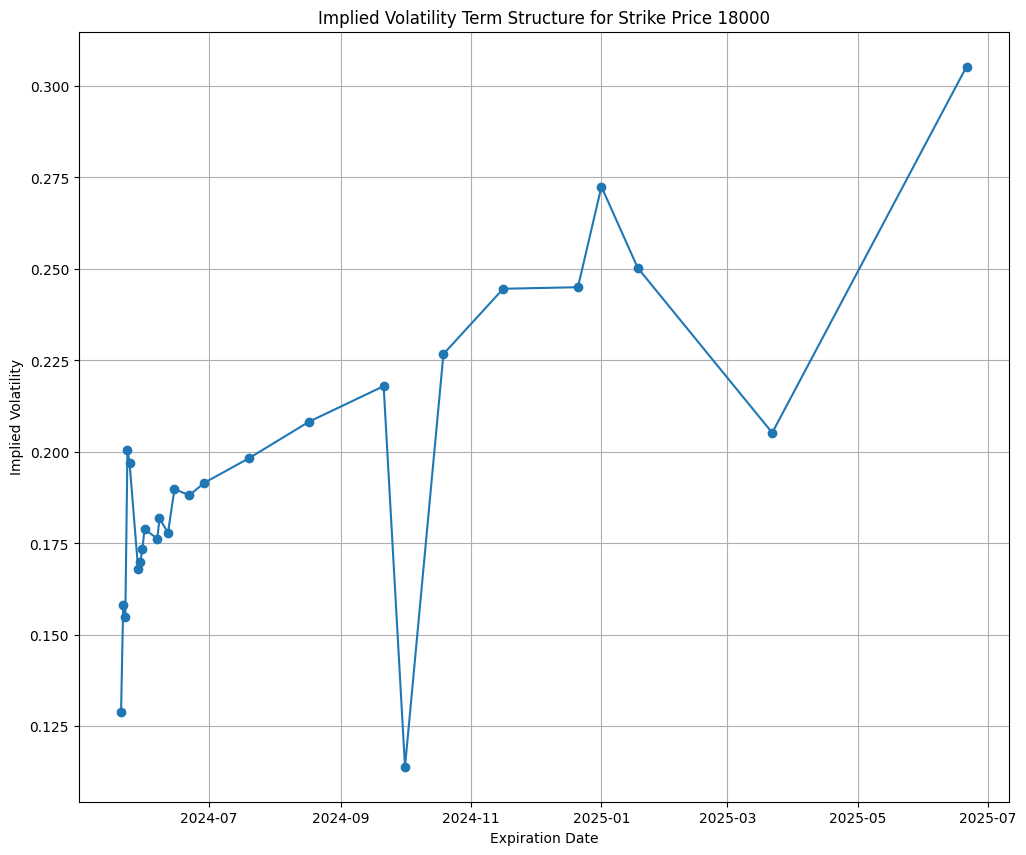

In [41]:
# Plot Implied Volatility Term Structure
plt.figure(figsize=(12,10))
plt.plot(filtered_calls_at_strike.index, filtered_calls_at_strike["impliedVolatility"], marker='o')
plt.title(f"Implied Volatility Term Structure for Strike Price {selected_strike_price}")
plt.xlabel("Expiration Date")
plt.ylabel("Implied Volatility")
plt.grid(True)